# Training LayoutLM-v3 model on Invoice Dataset

This Notebook is inspired from Mr.Niels Rogge [notebook](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/LayoutLMv3/Fine_tune_LayoutLMv3_on_FUNSD_(HuggingFace_Trainer).ipynb) for training LayoutLMv3 model from scratch.


This notebook is divided into three part namely:

1. Training
2. Testing
3. Inference on Gradio

Gradio Demo of LayoutLM v3 is  deployed at Huggingface spaces and is  available from the [notebook](https://huggingface.co/spaces/Theivaprakasham/layoutlmv3_invoice): https://huggingface.co/spaces/Theivaprakasham/layoutlmv3_invoice


Please do support with a like if you enjoy reading through the notebook or the demo.

Thank you Folks.

In [1]:
!nvidia-smi

Tue Jun  7 07:10:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              8
On-line CPU(s) list: 0-7
Thread(s) per core:  2
Core(s) per socket:  4
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.178
BogoMIPS:            4000.35
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0-7
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

In [4]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets seqeval
!pip install gradio
!sudo apt install tesseract-ocr
!pip install pytesseract

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 15.3 MB/s 
     |████████████████████████████████| 212 kB 68.3 MB/s 
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 256 kB 92.0 MB/s 
     |████████████████████████████████| 2.0 MB 76.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 11.1 MB 73.8 MB/s 
     |████████████████████████████████| 80 kB 3.7 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 4.0 MB 64.5 MB/s 
     |████████████████████████████████| 856 kB 69.2 MB/s 
     |██████████████████████████

In [5]:
!pip freeze

absl-py==1.0.0
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
analytics-python==1.4.0
anyio==3.6.1
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
asgiref==3.5.2
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
backoff==1.10.0
bcrypt==3.2.2
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2022.5.18.1
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cryptography==37.0.2
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.

In [61]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        (Deprecated, will be removed in v0.3.0) To login with username and password instead, interrupt with Ctrl+C.
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machi

In [62]:
!git config --global user.email "htheivaprakasham@gmail.com"
!git config --global user.name "theivaprakasham"

In [2]:
from datasets import load_dataset 

# this dataset uses the new Image feature :)
dataset = load_dataset("darentang/generated")

Reusing dataset sroie (/root/.cache/huggingface/datasets/darentang___sroie/sroie/1.0.0/123b71a2458ee87350d19e618ac7f21ab14e82b21945aef589bd809d479edf43)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 100
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 50
    })
})

In [4]:
dataset["train"].features

{'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None),
 'image_path': Value(dtype='string', id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=12, names=['O', 'B-ABN', 'B-BILLER', 'B-BILLER_ADDRESS', 'B-BILLER_POST_CODE', 'B-DUE_DATE', 'B-GST', 'B-INVOICE_DATE', 'B-INVOICE_NUMBER', 'B-SUBTOTAL', 'B-TOTAL', 'I-BILLER_ADDRESS'], id=None), length=-1, id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [5]:
example = dataset["train"][0]
example["image_path"]

'/root/.cache/huggingface/datasets/downloads/extracted/7624a20c6d0552a0cba52cbdda894a45c580f9c6fd2015db63f619aed942d939/generated/train/images/0.png'

In [6]:
words, bboxes, ner_tags = example["words"], example["bboxes"], example["ner_tags"]
print(words)
print(bboxes)
print(ner_tags)

['Miles', 'Invoice', '16', 'Copper', 'Lane', 'Invoice', '#:', '06471480', 'Sydney,', 'NSW', '2021', 'Invoice', 'Date:', '12/27/2021', 'ABN:', '18001467', 'Due', 'Date:', '12/26/2021', 'Bill', 'to:', 'Ship', 'to:', 'Cristina', 'Browning', 'Adan', 'Jacobson', '82', 'Wellness', 'Passage', '47', 'Auburn', 'Avenue', 'Sydney,', 'NSW', '2792', 'Sydney,', 'NSW', '2806', 'Qty', 'Description', 'Unit', 'Price', 'Amount', 'hair', 'tie', '17', '51', 'monitor', '27', '81', 'sofa', '62', '310', 'sticky', 'note', '84', '420', 'milk', '31', '155', '3', 'sand', 'paper', '88', '264', '3', 'bowl', '83', '249', '2', 'scotch', 'tape', '67', '134', '4', 'packing', 'peanuts', '21', '84', 'wagon', '63', '126', 'Subtotal', '1874.00', 'GST', '187.40', 'Total', '2061.40', 'Terms', 'and', 'Conditions', 'Blahblah']
[[82, 124, 194, 151], [865, 134, 948, 151], [84, 165, 98, 179], [101, 165, 155, 179], [158, 165, 200, 179], [790, 165, 851, 179], [854, 165, 875, 179], [879, 165, 948, 179], [82, 180, 137, 195], [140, 18

In [7]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

In [8]:
from datasets.features import ClassLabel

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image_path"
text_column_name = "words"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [9]:
print(label_list)

['O', 'B-ABN', 'B-BILLER', 'B-BILLER_ADDRESS', 'B-BILLER_POST_CODE', 'B-DUE_DATE', 'B-GST', 'B-INVOICE_DATE', 'B-INVOICE_NUMBER', 'B-SUBTOTAL', 'B-TOTAL', 'I-BILLER_ADDRESS']


In [10]:
print(id2label)

{0: 'O', 1: 'B-ABN', 2: 'B-BILLER', 3: 'B-BILLER_ADDRESS', 4: 'B-BILLER_POST_CODE', 5: 'B-DUE_DATE', 6: 'B-GST', 7: 'B-INVOICE_DATE', 8: 'B-INVOICE_NUMBER', 9: 'B-SUBTOTAL', 10: 'B-TOTAL', 11: 'I-BILLER_ADDRESS'}


In [11]:
from PIL import Image

In [12]:
def prepare_examples(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']] #Image.open(examples[image_column_name])
  words = examples[text_column_name]
  boxes = examples[boxes_column_name]
  word_labels = examples[label_column_name]

  encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

  return encoding

In [13]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(ClassLabel(names=label_list)),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Loading cached processed dataset at /root/.cache/huggingface/datasets/darentang___sroie/sroie/1.0.0/123b71a2458ee87350d19e618ac7f21ab14e82b21945aef589bd809d479edf43/cache-31f8cf08421e9932.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

In [14]:
train_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 100
})

In [15]:
example = train_dataset[0]
processor.tokenizer.decode(example["input_ids"])

'<s> Miles Invoice 16 Copper Lane Invoice #: 06471480 Sydney, NSW 2021 Invoice Date: 12/27/2021 ABN: 18001467 Due Date: 12/26/2021 Bill to: Ship to: Cristina Browning Adan Jacobson 82 Wellness Passage 47 Auburn Avenue Sydney, NSW 2792 Sydney, NSW 2806 Qty Description Unit Price Amount hair tie 17 51 monitor 27 81 sofa 62 310 sticky note 84 420 milk 31 155 3 sand paper 88 264 3 bowl 83 249 2 scotch tape 67 134 4 packing peanuts 21 84 wagon 63 126 Subtotal 1874.00 GST 187.40 Total 2061.40 Terms and Conditions Blahblah</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

In [16]:
train_dataset.set_format("torch")

In [17]:
import torch

example = train_dataset[0]
for k,v in example.items():
    print(k,v.shape)

pixel_values torch.Size([3, 224, 224])
input_ids torch.Size([512])
attention_mask torch.Size([512])
bbox torch.Size([512, 4])
labels torch.Size([512])


In [18]:
eval_dataset

Dataset({
    features: ['pixel_values', 'input_ids', 'attention_mask', 'bbox', 'labels'],
    num_rows: 50
})

In [19]:
processor.tokenizer.decode(eval_dataset[0]["input_ids"])

'<s> Buckley Invoice 95 Hart Street Invoice #: 37220207 Sydney, NSW 2774 Invoice Date: 12/27/2021 ABN: 92670378 Due Date: 12/27/2021 Bill to: Ship to: Jaylan Romero Cristina Browning 88 Green Passage 12 Beacon Avenue Sydney, NSW 2355 Sydney, NSW 2095 Qty Description Unit Price Amount toe ring 77 385 eye liner 87 348 plastic fork 28 140 packing peanuts 72 288 checkbook 12 24 OTOT CO CTIA TO A CT IA OT packing peanuts 72 288 puddle 86 430 desk 75 225 spoon 26 130 shoes 29 145 Subtotal 2403.00 GST 240.30 Total 2643.30 Terms and Conditions Blahblah</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [20]:
for id, label in zip(train_dataset[0]["input_ids"], train_dataset[0]["labels"]):
  print(processor.tokenizer.decode([id]), label.item())

<s> -100
 Miles 2
 Inv 0
oice -100
 16 3
 Copper 11
 Lane 11
 Inv 0
oice -100
 # 0
: -100
 0 8
647 -100
14 -100
80 -100
 Sydney 0
, -100
 NSW 0
 2021 4
 Inv 0
oice -100
 Date 0
: -100
 12 7
/ -100
27 -100
/ -100
20 -100
21 -100
 AB 0
N -100
: -100
 1800 1
14 -100
67 -100
 Due 0
 Date 0
: -100
 12 5
/ -100
26 -100
/ -100
20 -100
21 -100
 Bill 0
 to 0
: -100
 Ship 0
 to 0
: -100
 Crist 0
ina -100
 Brown 0
ing -100
 Ad 0
an -100
 Jacob 0
son -100
 82 0
 Well 0
ness -100
 Passage 0
 47 0
 Auburn 0
 Avenue 0
 Sydney 0
, -100
 NSW 0
 27 0
92 -100
 Sydney 0
, -100
 NSW 0
 280 0
6 -100
 Q 0
ty -100
 Description 0
 Unit 0
 Price 0
 Amount 0
 hair 0
 tie 0
 17 0
 51 0
 monitor 0
 27 0
 81 0
 sofa 0
 62 0
 310 0
 sticky 0
 note 0
 84 0
 420 0
 milk 0
 31 0
 155 0
 3 0
 sand 0
 paper 0
 88 0
 264 0
 3 0
 bowl 0
 83 0
 249 0
 2 0
 sc 0
ot -100
ch -100
 tape 0
 67 0
 134 0
 4 0
 packing 0
 peanuts 0
 21 0
 84 0
 wagon 0
 63 0
 126 0
 Sub 0
total -100
 18 9
74 -100
. -100
00 -100
 GST 0
 187 6
. -100

In [21]:
from datasets import load_metric

metric = load_metric("seqeval")

In [22]:
import numpy as np

return_entity_level_metrics = False

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }

In [23]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="layoutlmv3-finetuned-invoice",
                                  max_steps=2000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  push_to_hub=True,
                                  push_to_hub_model_id=f"layoutlmv3-finetuned-invoice", # this is the name we'll use for our model on the hub
                                  )

/usr/local/lib/python3.7/dist-packages/transformers/training_args.py:1131: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case Theivaprakasham/layoutlmv3-finetuned-invoice).
  FutureWarning,


In [25]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice into local empty directory.
max_steps is given, it will override any value given in num_train_epochs


In [26]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 100
  Num Epochs = 40
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 2000
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:755: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,0.087818,0.968000,0.981744,0.974824,0.996629
200,No log,0.024138,0.972000,0.985801,0.978852,0.997051
300,No log,0.018570,0.972000,0.985801,0.978852,0.997051
400,No log,0.018407,0.985386,0.957404,0.971193,0.995576
500,0.130800,0.012063,0.972000,0.985801,0.978852,0.997051
600,0.130800,0.007569,0.993878,0.987830,0.990844,0.998736
700,0.130800,0.004694,1.000000,0.995943,0.997967,0.999579
800,0.130800,0.003629,0.995951,0.997972,0.996960,0.999579
900,0.130800,0.004462,0.995951,0.997972,0.996960,0.999579
1000,0.006900,0.004310,0.995951,0.997972,0.996960,0.999579


***** Running Evaluation *****
  Num examples = 50
  Batch size = 2
***** Running Evaluation *****
  Num examples = 50
  Batch size = 2
***** Running Evaluation *****
  Num examples = 50
  Batch size = 2
***** Running Evaluation *****
  Num examples = 50
  Batch size = 2
***** Running Evaluation *****
  Num examples = 50
  Batch size = 2
Saving model checkpoint to layoutlmv3-finetuned-invoice/checkpoint-500
Configuration saved in layoutlmv3-finetuned-invoice/checkpoint-500/config.json
Model weights saved in layoutlmv3-finetuned-invoice/checkpoint-500/pytorch_model.bin
Feature extractor saved in layoutlmv3-finetuned-invoice/checkpoint-500/preprocessor_config.json
tokenizer config file saved in layoutlmv3-finetuned-invoice/checkpoint-500/tokenizer_config.json
Special tokens file saved in layoutlmv3-finetuned-invoice/checkpoint-500/special_tokens_map.json
Feature extractor saved in layoutlmv3-finetuned-invoice/preprocessor_config.json
tokenizer config file saved in layoutlmv3-finetuned-in

TrainOutput(global_step=2000, training_loss=0.03555644550919533, metrics={'train_runtime': 426.3888, 'train_samples_per_second': 9.381, 'train_steps_per_second': 4.691, 'total_flos': 1061725814784000.0, 'train_loss': 0.03555644550919533, 'epoch': 40.0})

In [27]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 50
  Batch size = 2
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:755: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


{'epoch': 40.0,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_loss': 0.0012058715801686049,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 2.2427,
 'eval_samples_per_second': 22.295,
 'eval_steps_per_second': 11.148}

In [28]:
trainer.push_to_hub()

Saving model checkpoint to layoutlmv3-finetuned-invoice
Configuration saved in layoutlmv3-finetuned-invoice/config.json
Model weights saved in layoutlmv3-finetuned-invoice/pytorch_model.bin
Feature extractor saved in layoutlmv3-finetuned-invoice/preprocessor_config.json
tokenizer config file saved in layoutlmv3-finetuned-invoice/tokenizer_config.json
Special tokens file saved in layoutlmv3-finetuned-invoice/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/480M [00:00<?, ?B/s]

Upload file runs/Jun07_04-11-18_850ddd2feefa/events.out.tfevents.1654575104.850ddd2feefa.781.0:  23%|##2      …

Upload file runs/Jun07_04-11-18_850ddd2feefa/events.out.tfevents.1654575554.850ddd2feefa.781.2: 100%|#########…

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice
   95870cb..d38a2b9  main -> main

remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice
   d38a2b9..e9d46aa  main -> main



'https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice/commit/d38a2b99f116f3f79c0db3229f618da537a5482d'

In [29]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("layoutlmv3-finetuned-invoice")#/content/layoutlmv3-finetuned-invoice/checkpoint-2000

loading configuration file layoutlmv3-finetuned-invoice/config.json
Model config LayoutLMv3Config {
  "_name_or_path": "layoutlmv3-finetuned-invoice",
  "architectures": [
    "LayoutLMv3ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-ABN",
    "2": "B-BILLER",
    "3": "B-BILLER_ADDRESS",
    "4": "B-BILLER_POST_CODE",
    "5": "B-DUE_DATE",
    "6": "B-GST",
    "7": "B-INVOICE_DATE",
    "8": "B-INVOICE_NUMBER",
    "9": "B-SUBTOTAL",
    "10": "B-TOTAL",
    "11": "I-BILLER_ADDRESS"
  },
  "initializer_range": 0.02,
  "input_size": 224,
  "intermediate_size": 3072,
  "label2id": {
    "B-ABN": 1,
    "B-BILLER": 2,
    "B-BILLER_ADDRESS": 3,
    "B-BILLER_POST_CODE": 4,
    

In [30]:
example = dataset["test"][0]
print(example.keys())

image = Image.open(example["image_path"])
words = example["words"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])
input_ids torch.Size([1, 150])
attention_mask torch.Size([1, 150])
bbox torch.Size([1, 150, 4])
labels torch.Size([1, 150])
pixel_values torch.Size([1, 3, 224, 224])


In [31]:
with torch.no_grad():
  outputs = model(**encoding)

logits = outputs.logits
print(logits.shape)

predictions = logits.argmax(-1).squeeze().tolist()
print(predictions)

/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:755: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


torch.Size([1, 150, 12])
[0, 2, 0, 0, 3, 11, 11, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 4, 4, 0, 0, 0, 0, 5, 5, 5, 5, 7, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 6, 0, 6, 6, 6, 0, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
labels = encoding.labels.squeeze().tolist()
print(labels)

[-100, 2, 0, -100, 3, 11, 11, 0, -100, 0, -100, 8, -100, -100, 0, -100, 0, 4, -100, 0, -100, 0, -100, 5, -100, -100, -100, -100, -100, 0, -100, -100, 1, -100, -100, -100, 0, 0, -100, 0, -100, -100, -100, -100, -100, 0, 0, -100, 0, 0, -100, 0, -100, 0, 0, -100, 0, -100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, -100, 0, -100, 0, 0, -100, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, -100, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 9, -100, -100, -100, 0, 6, -100, -100, 0, 10, -100, -100, -100, 0, 0, 0, 0, -100, -100, -100, -100]


In [33]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

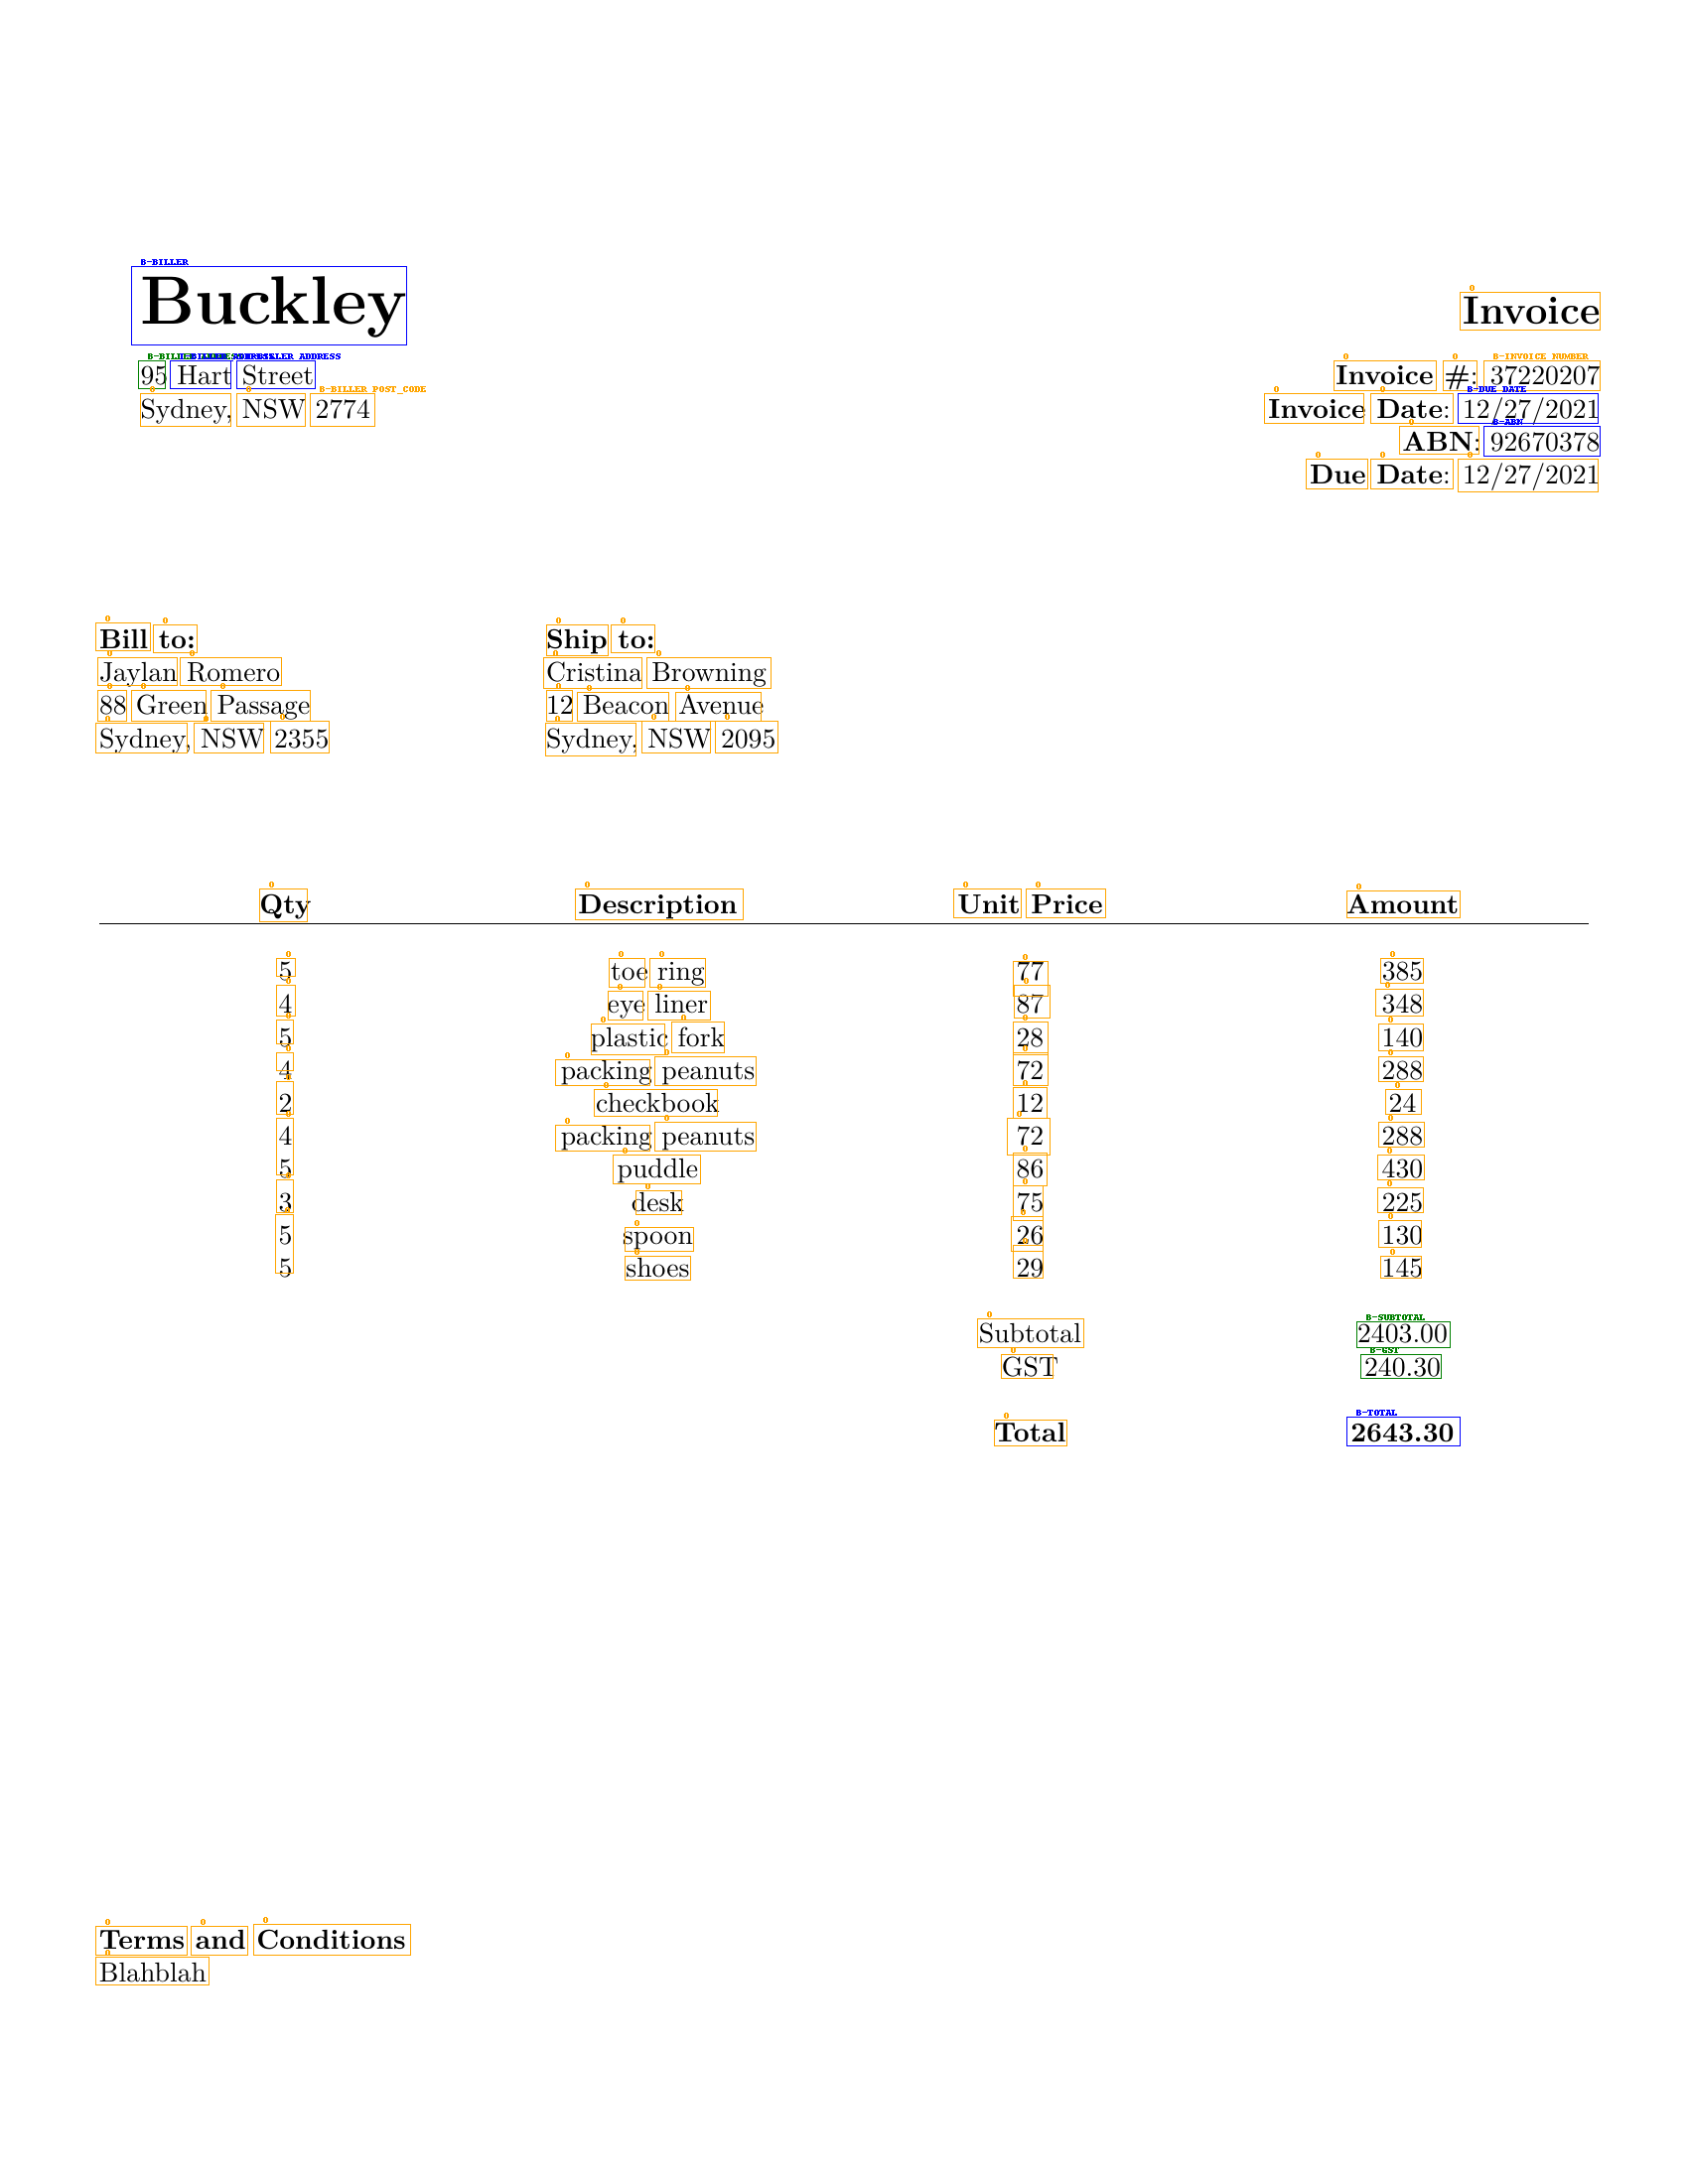

In [34]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    #label = label[2:]
    if not label:
      return 'other'
    return label

label2color ={
    "B-ABN": 'blue',
    "B-BILLER": 'blue',
    "B-BILLER_ADDRESS": 'green',
    "B-BILLER_POST_CODE": 'orange',
    "B-DUE_DATE": "blue",
    "B-GST": 'green',
    "B-INVOICE_DATE": 'violet',
    "B-INVOICE_NUMBER": 'orange',
    "B-SUBTOTAL": 'green',
    "B-TOTAL": 'blue',
    "I-BILLER_ADDRESS": 'blue',
    "O": 'orange'
  } 

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

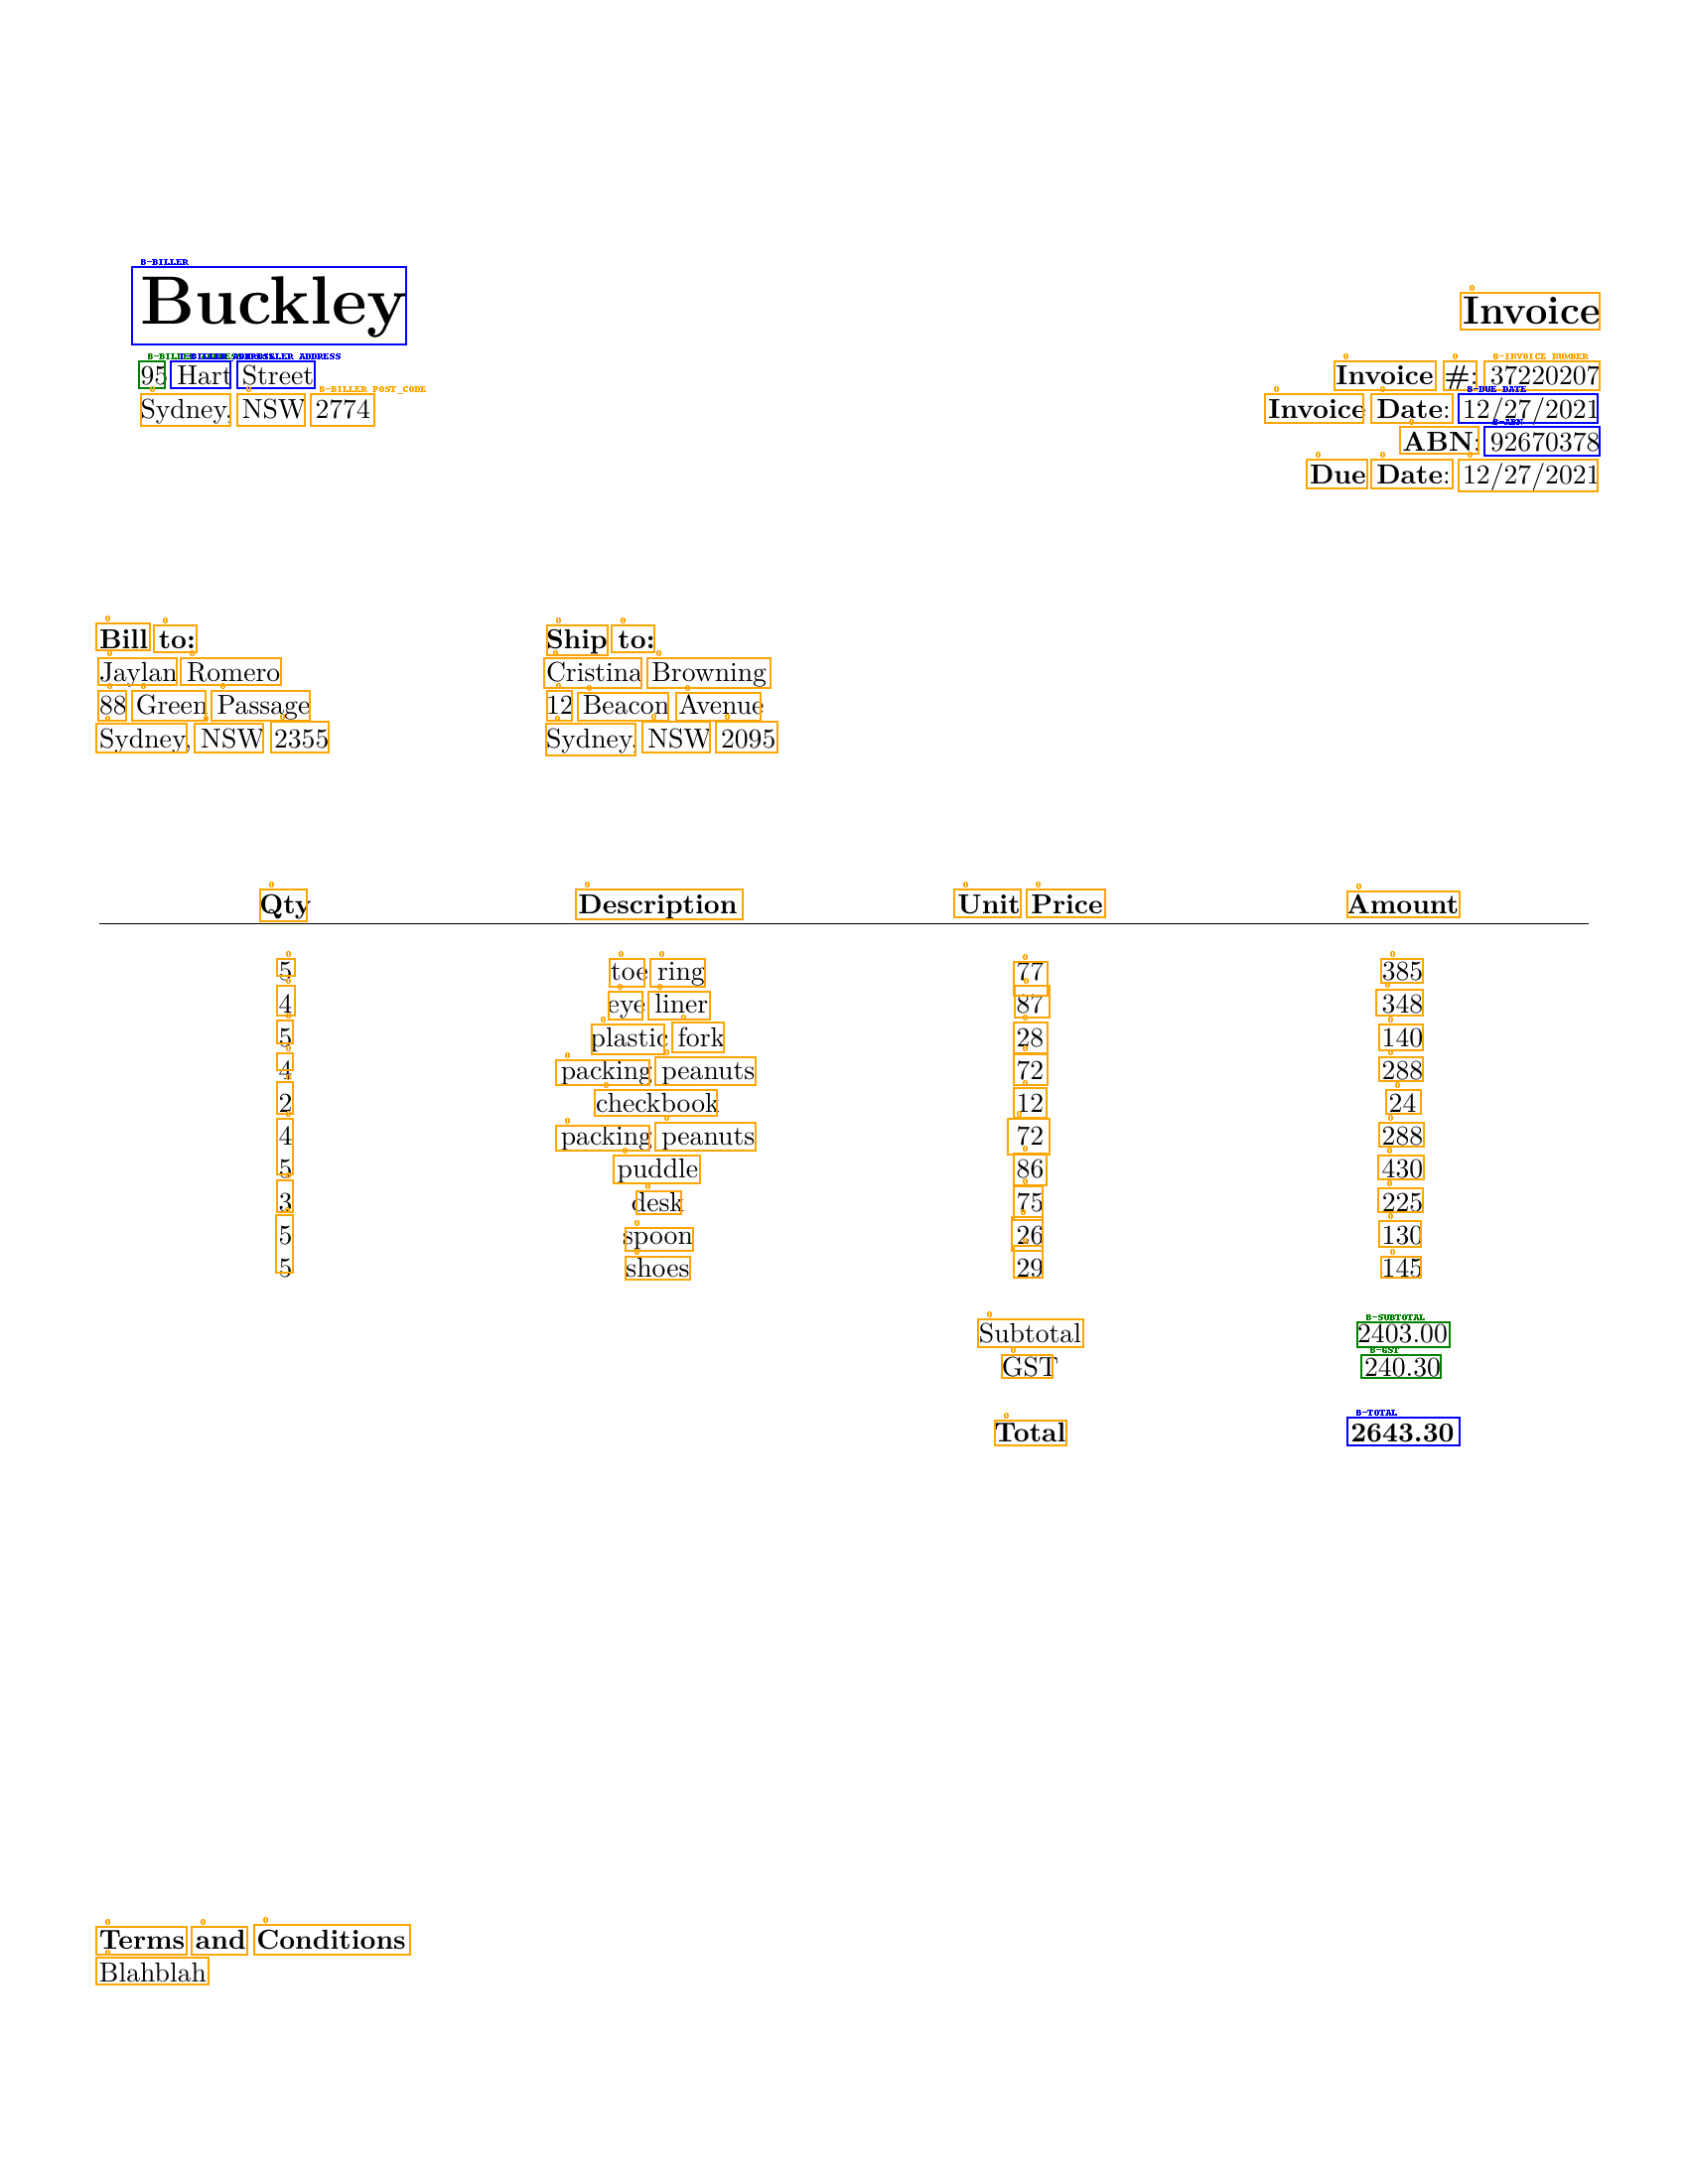

In [35]:
image = Image.open(example["image_path"]).convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label])
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image

# Inference

In [3]:
import os

import gradio as gr
import numpy as np
from transformers import AutoModelForTokenClassification
from datasets.features import ClassLabel
from transformers import AutoProcessor
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
import torch
from datasets import load_metric
from transformers import LayoutLMv3ForTokenClassification
from transformers.data.data_collator import default_data_collator


from transformers import AutoModelForTokenClassification
from datasets import load_dataset
from PIL import Image, ImageDraw, ImageFont


processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=True)
model = AutoModelForTokenClassification.from_pretrained("layoutlmv3-finetuned-invoice")



# load image example
dataset = load_dataset("darentang/generated", split="test")
Image.open(dataset[2]["image_path"]).convert("RGB").save("example1.png")
Image.open(dataset[1]["image_path"]).convert("RGB").save("example2.png")
Image.open(dataset[0]["image_path"]).convert("RGB").save("example3.png")
# define id2label, label2color
labels = dataset.features['ner_tags'].feature.names
id2label = {v: k for v, k in enumerate(labels)}
label2color = {
    "B-ABN": 'blue',
    "B-BILLER": 'blue',
    "B-BILLER_ADDRESS": 'green',
    "B-BILLER_POST_CODE": 'orange',
    "B-DUE_DATE": "blue",
    "B-GST": 'green',
    "B-INVOICE_DATE": 'violet',
    "B-INVOICE_NUMBER": 'orange',
    "B-SUBTOTAL": 'green',
    "B-TOTAL": 'blue',
    "I-BILLER_ADDRESS": 'blue',
    "O": 'orange'
  } 

def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]


def iob_to_label(label):
    return label



def process_image(image):

    print(type(image))
    width, height = image.size

    # encode
    encoding = processor(image, truncation=True, return_offsets_mapping=True, return_tensors="pt")
    offset_mapping = encoding.pop('offset_mapping')

    # forward pass
    outputs = model(**encoding)

    # get predictions
    predictions = outputs.logits.argmax(-1).squeeze().tolist()
    token_boxes = encoding.bbox.squeeze().tolist()

    # only keep non-subword predictions
    is_subword = np.array(offset_mapping.squeeze().tolist())[:,0] != 0
    true_predictions = [id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
    true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

    # draw predictions over the image
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    for prediction, box in zip(true_predictions, true_boxes):
        predicted_label = iob_to_label(prediction)
        draw.rectangle(box, outline=label2color[predicted_label])
        draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)
    
    return image


title = "Invoice Information extraction using LayoutLMv3 model"
description = "Invoice Information Extraction - We use Microsoft's LayoutLMv3 trained on Invoice Dataset to predict the Biller Name, Biller Address, Biller post_code, Due_date, GST, Invoice_date, Invoice_number, Subtotal and Total. To use it, simply upload an image or use the example image below. Results will show up in a few seconds."

article="<b>References</b><br>[1] Y. Xu et al., “LayoutLMv3: Pre-training for Document AI with Unified Text and Image Masking.” 2022. <a href='https://arxiv.org/abs/2204.08387'>Paper Link</a><br>[2]  <a href='https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LayoutLMv3'>LayoutLMv3 training and inference</a>" 

examples =[['example1.png'],['example2.png'],['example3.png']]

css = """.output_image, .input_image {height: 600px !important}"""

iface = gr.Interface(fn=process_image, 
                     inputs=gr.inputs.Image(type="pil"), 
                     outputs=gr.outputs.Image(type="pil", label="annotated image"),
                     title=title,
                     description=description,
                     article=article,
                     examples=examples,
                     css=css,
                     analytics_enabled = True, enable_queue=True)

iface.launch(inline=False, share=True, debug=True)

Reusing dataset sroie (/root/.cache/huggingface/datasets/darentang___sroie/sroie/1.0.0/123b71a2458ee87350d19e618ac7f21ab14e82b21945aef589bd809d479edf43)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://34470.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


<class 'PIL.Image.Image'>


/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:755: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


<class 'PIL.Image.Image'>


/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:755: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f7624fb8a90>,
 'http://127.0.0.1:7861/',
 'https://34470.gradio.app')